# Segmentez des clients d'un site e-commerce


In [1]:
#imports 
import pandas as pd

import numpy as np
from numpy import array
from numpy import argmax

import os
import datetime
import time
import random
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


In [2]:
#traduire les labels en anglais
directory= "../data/"
df_product = pd.read_csv(directory+"olist_products_dataset.csv", error_bad_lines=False, sep=',')
df_cat_names = pd.read_csv(directory+"product_category_name_translation.csv", error_bad_lines=False, sep=',')
df_geo = pd.read_csv(directory+'olist_geolocation_dataset.csv', error_bad_lines=False, sep=',')
df_customer = pd.read_csv(directory+'olist_customers_dataset.csv', error_bad_lines=False, sep=',')
df_order_items= pd.read_csv(directory+"olist_order_items_dataset.csv", error_bad_lines=False, sep=',')
df_order_payment = pd.read_csv(directory+"olist_order_payments_dataset.csv", error_bad_lines=False, sep=',')
df_orders = pd.read_csv(directory+"olist_orders_dataset.csv", error_bad_lines=False, sep=',')
df_order_reviews = pd.read_csv(directory+"olist_order_reviews_dataset.csv", error_bad_lines=False, sep=',')
df_seller = pd.read_csv(directory+"olist_sellers_dataset.csv", error_bad_lines=False, sep=',')

df_file_list= [df_product, df_cat_names, df_geo , df_customer, df_order_items, df_order_payment , df_orders , df_order_reviews , df_seller ]


In [3]:
for df in df_file_list :
    print(df.columns)
    print(df.shape)


Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
(32951, 9)
Index(['product_category_name', 'product_category_name_english'], dtype='object')
(71, 2)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
(1000163, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
(99441, 5)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
(112650, 7)
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
(103886, 5)
Index(['order_id', 'customer_id', 'order_status', 'order_

In [4]:
df_product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [5]:
df_cat_names.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,eletroportateis,fashion_underwear_beach
freq,1,1


In [6]:
df_geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [7]:
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
df_order_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [10]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,f713f69364d66b2020e04ec8892d1285,b8106fd2ea14b1cb7d883bdbaafdc82a,delivered,2017-11-20 10:59:08,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [11]:
df_order_reviews.describe()

,review_score
count,100000.000000
mean,4.070890
std,1.359663
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
df_seller.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [13]:
df_product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [14]:
df_product['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [15]:
df_cat_names.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [16]:
df_geo.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [17]:
df_customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [18]:
df_customer['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [19]:
df_order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [20]:
df_order_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [21]:
df_order_payment['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [22]:
df_order_payment['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [23]:
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [24]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [25]:
df_order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [26]:
df_order_reviews['review_score'].unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [27]:
df_seller.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [28]:
df_seller['seller_state'].unique()

array(['SP', 'RJ', 'PE', 'PR', 'GO', 'SC', 'BA', 'DF', 'RS', 'MG', 'RN',
       'MT', 'CE', 'PB', 'AC', 'ES', 'RO', 'PI', 'MS', 'SE', 'MA', 'AM',
       'PA'], dtype=object)

## Traduction protugais /anglais

In [29]:
#traduction des catégories en anglais
df_product = pd.merge(df_product, df_cat_names, on=['product_category_name'], how='left')
df_product= df_product.drop_duplicates()
df_product.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


In [30]:
#laisser le feature nom categorie en anglais et eliminer le protugais
categories = df_product['product_category_name_english'].unique()
df_product= df_product.drop('product_category_name', axis=1)
df_product = df_product.rename(columns={'product_category_name_english': 'product_category_name'})
df_product.head(2)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


In [31]:
df_geo = df_geo.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})

In [32]:
df_file_list= [df_product, df_cat_names, df_geo , df_customer, df_order_items, df_order_payment , df_orders , df_order_reviews , df_seller ]

## Ingenierie des variables

In [33]:
#initialisation du dataframe avec l'id et l'unique id de client
def initialize_dataframe(df_customer_copy):
    final_customer_dataframe = pd.DataFrame()
    #construire le nouveau dataframe en effectuant des transformations progressives sur les variables 
    final_customer_dataframe ['customer_id']= df_customer_copy['customer_id']
    final_customer_dataframe ['customer_unique_id']= df_customer_copy['customer_unique_id']
    final_customer_dataframe['customer_zip_code_prefix']= df_customer_copy['customer_zip_code_prefix']
    return final_customer_dataframe

In [34]:
#extraction d'informations relatives aux produits achetés et sommes dépensées 
def product_information_add(df_customer_copy, df_order_items_copy, df_orders_copy):
    #Nombre de produits achetés par client
    produits_par_client = pd.merge(df_customer_copy, 
                           pd.merge(df_order_items_copy, 
                                    df_orders_copy, how="left" , on ="order_id"), how="left", on="customer_id")
    produits_par_client = produits_par_client.drop_duplicates()
    produits_par_client['Total_produits_achete'] = produits_par_client.groupby('customer_id')['order_item_id'].transform('count')
    #Nombre de commande par utilisateur (frequence)
    produits_par_client['Nombre_commandes'] = produits_par_client.groupby('customer_id')['order_id'].transform('count')
    #Montant moyen d'achat par commande par utilisateur
    produits_par_client['Total_prices'] = produits_par_client.groupby('customer_id')['price'].transform('sum')
    produits_par_client['Average_price'] = produits_par_client['Total_prices'] /produits_par_client['Nombre_commandes']
    #Montant max d'achat par commande par utilisateur
    produits_par_client["Max_price"] = produits_par_client.groupby('customer_id')['Total_prices'].transform(max)
    #merge avec dataframe final
    produits = produits_par_client[['customer_id', 'Max_price', 'Average_price', 'Total_prices',  'Nombre_commandes', 'Total_produits_achete']]
    return  produits_par_client


In [35]:
#extraction d'informations relatives aux revies et scores
def review_information_add(df_customer_copy, df_order_reviews, df_orders_copy):
    #Personne qui commente/ note/ ne réagit pas 
    reviews_par_client = pd.merge(df_customer_copy, 
                           pd.merge(df_order_reviews, 
                                    df_orders_copy, how="left" , on ="order_id"), how="left", on="customer_id")
    reviews_par_client = reviews_par_client.drop_duplicates()
    reviews_par_client['gives_score'] = reviews_par_client.groupby("customer_id")['review_score'].transform('count')
    reviews_par_client['makes_review'] = reviews_par_client.groupby("customer_id")['review_comment_message'].transform('count')
    reviews = reviews_par_client[['customer_id', 'gives_score', 'makes_review']]
    return reviews

In [36]:
#extraction d'informations relatives aux characteristiques de produits (categories, volumes et poids)
def product_characteristics_add(df_customer_copy, produits_par_client, df_product_copy):
    categories = df_product_copy['product_category_name'].unique()
    cat= ['customer_id']
    for e in categories :
        cat.append(e)
     #Poids moyens de commandes 
    product_catacteristics = pd.merge(produits_par_client, df_product_copy, how="left" , on ="product_id")
    
    product_catacteristics = product_catacteristics.drop_duplicates()
    product_catacteristics['Total_weight'] = product_catacteristics.groupby('customer_id')['product_weight_g'].transform('sum')
    product_catacteristics['Mean_weight'] = product_catacteristics['Total_weight']/product_catacteristics ['Nombre_commandes']
    #Poids maximum de commandes   
    df_temp_grouped = product_catacteristics.groupby(['customer_id', 'order_id'])
    product_catacteristics['Max_weight'] = product_catacteristics.groupby(['customer_id', 'order_id'])['product_weight_g'].transform('sum').max()
    #Volume moyen des commandes 
    product_catacteristics['item_volume'] = product_catacteristics['product_length_cm']*product_catacteristics['product_height_cm']*product_catacteristics['product_width_cm']
    product_catacteristics['order_volume'] = product_catacteristics.groupby(['customer_id', 'order_id'])['item_volume'].transform("sum")
    product_catacteristics['Mean_Volume'] = product_catacteristics.groupby(['order_id'])['order_volume'].transform('mean')
    #les categories et leurs fréquences
    #grouped_caracteristics = product_catacteristics.groupby(['customer_id', 'order_id'])
    
    #print(product_catacteristics.head())
    characteristics= product_catacteristics[['customer_id',  'Mean_weight',  'Mean_Volume']]
    #print(characteristics.head())
    for product_category in categories :
        df_temp = product_catacteristics[product_catacteristics['product_category_name'] == product_category]
        #print(product_category)
        product_catacteristics[product_category]= df_temp.groupby('customer_id')['order_item_id'].transform('count')
    #print(product_catacteristics.columns)
    df_categories = pd.DataFrame()
    df_categories = product_catacteristics[cat]
    most_bought_categories = df_categories.copy()
    most_bought_categories = pd.merge(most_bought_categories, df_customer_copy, how ="left", on ="customer_id")
    most_bought_categories = most_bought_categories.drop_duplicates()
    new_cat = ['customer_unique_id']
    for c in categories :
        new_cat.append(c)
    most_bought_categories = most_bought_categories[new_cat]
    return characteristics, most_bought_categories

In [37]:
#extraction d'informations relatives à la récence des commandes
def get_recency_info(df_customer_copy, df_orders_copy) : 
    dateTimeObj = datetime.datetime.now().toordinal()
    orders_par_client = pd.merge(df_customer_copy, df_orders_copy, how="left" , on ="customer_id")
    orders_par_client = orders_par_client.drop_duplicates()
    orders_par_client['order_purchase_timestamp']= orders_par_client['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(x).toordinal() if pd.notna(x) else 0)
    #(orders_par_client['order_purchase_timestamp'].values)
    grouped_orders= orders_par_client.groupby('customer_id')
    orders_par_client['Recency'] = dateTimeObj - orders_par_client['order_purchase_timestamp']
    orders = orders_par_client[['customer_id', 'Recency']] 
    return orders


In [38]:
#extraction d'informations relatives aux modes de payements utilisés
def payment_information_add(df_customer_copy, df_order_payment_copy, df_orders_copy):
    #Moyens de payement utilisés et fréquence d'utilisation
    payment_par_client = pd.merge(df_customer_copy, 
                           pd.merge(df_order_payment_copy, 
                                    df_orders_copy, how="left" , on ="order_id"), how="left", on="customer_id")
    payment_par_client = payment_par_client.drop_duplicates()
    payment_types = ['credit_card', 'debit_card', 'boleto', 'voucher', 'not_defined']
    for i in range(0, len(payment_types)) : 
        df_payment_type = pd.DataFrame()
        df_payment_type = payment_par_client[payment_par_client['payment_type'] == payment_types[i]]
        grouped_payments = df_payment_type.groupby('customer_id')
        payment_par_client[payment_types[i]]= grouped_payments['payment_type'].transform('count')
    payment = payment_par_client[['customer_id', 'credit_card', 'debit_card', 'boleto', 'voucher']]
    #payment = payment_par_client[["customer_id", 'card', 'other']]
    return payment

In [39]:
#corrections à appliquer au dataframe avant exploitataion 
def refine_dataframe(df):
    df = df.groupby(['customer_unique_id']).sum()
    df = df.fillna(0)
    #df = df.drop('customer_id', axis=1)
    df = df.drop('customer_zip_code_prefix', axis=1)
    #df = df.drop_duplicates(subset='customer_unique_id', keep="first")
    return df

In [40]:
#fonction rassemblant les différents traitements cités et générant 
#les features et info de catégorie
def transform_features(df_file_list, add_cat):
   
    most_bought_categories =  pd.DataFrame()
    #create data copies
    df_product_copy = df_file_list[0].copy()
    df_cat_names_copy= df_file_list[1].copy()
    df_geo_copy= df_file_list[2].copy()
    df_customer_copy= df_file_list[3].copy()
    df_order_items_copy= df_file_list[4].copy()
    df_order_payment_copy= df_file_list[5].copy()
    df_orders_copy= df_file_list[6].copy()
    df_order_reviews_copy= df_file_list[7].copy()
    df_seller_copy = df_file_list[8].copy()
    
    #transform features
    final_customer_dataframe = initialize_dataframe(df_customer_copy)
    produits_par_client= product_information_add(df_customer_copy, df_order_items_copy, df_orders_copy)
    produits = produits_par_client[['customer_id', 'Average_price', 'Total_prices',  'Nombre_commandes', 'Total_produits_achete']] 
    reviews = review_information_add(df_customer_copy, df_order_reviews, df_orders_copy)
    characteristics, most_bought_categories = product_characteristics_add(df_customer_copy, produits_par_client, df_product_copy)
    orders = get_recency_info(df_customer_copy, df_orders_copy)
    payment =  payment_information_add(df_customer_copy, df_order_payment_copy, df_orders_copy)
    
    # final dataframe 
    final_customer_dataframe=  pd.merge(final_customer_dataframe, produits, how="left", on="customer_id") 
    final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    print(final_customer_dataframe.columns)
    final_customer_dataframe=  pd.merge(final_customer_dataframe, reviews, how="left", on="customer_id") 
    final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    print(final_customer_dataframe.columns)
    final_customer_dataframe=  pd.merge(final_customer_dataframe, payment, how="left", on="customer_id") 
    final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    print(final_customer_dataframe.columns)
    final_customer_dataframe=  pd.merge(final_customer_dataframe, characteristics, how="left", on="customer_id") 
    final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    print(final_customer_dataframe.columns)
    final_customer_dataframe = pd.merge(final_customer_dataframe, orders, how="left", on="customer_id") 
    final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    final_customer_dataframe = refine_dataframe(final_customer_dataframe)
    if add_cat :
        final_customer_dataframe = pd.merge(final_customer_dataframe, most_bought_categories, how="left", on="customer_unique_id") 
        final_customer_dataframe = final_customer_dataframe.drop_duplicates()
    
    print(final_customer_dataframe.shape)
    return final_customer_dataframe, most_bought_categories

In [41]:
final_customer_dataframe, most_bought_categories = transform_features(df_file_list, False)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete'],
      dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review'],
      dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review', 'credit_card',
       'debit_card', 'boleto', 'voucher'],
      dtype='object')
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review', 'credit_card',
       'debit_card', 'boleto', 'voucher', 'Mean_weight', 'Mean_Volume'],
      dtype='object')
(96096, 13)


In [42]:
final_customer_dataframe.columns

Index(['Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review', 'credit_card',
       'debit_card', 'boleto', 'voucher', 'Mean_weight', 'Mean_Volume',
       'Recency'],
      dtype='object')

In [43]:
most_bought_categories.drop_duplicates()

,customer_unique_id,perfumery,art,sports_leisure,baby,housewares,musical_instruments,cool_stuff,furniture_decor,home_appliances,...,dvds_blu_ray,arts_and_craftmanship,furniture_bedroom,cine_photo,diapers_and_hygiene,flowers,home_comfort_2,security_and_services,furniture_mattress_and_upholstery,cds_dvds_musicals
0,861eff4711a542e4b93843c6dd7febb0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,290c77bc529b7ac935b93aa66c333dc3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,060e732b5b29e8181a18229c7b0b2b5e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,259dac757896d24d7702b9acbbff3f3c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,345ecd01c38d18a9036ed96c73b8d066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,1a29b476fee25c95fbafc67c5ac95cf8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113421,d52a67c98be1cf6a5c84435bd38d095d,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113422,e9f50caf99f032f0bf3c55141f019d99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113423,73c2643a0a458b49f58cea58833b192e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
most_bought_categories = most_bought_categories.groupby(['customer_unique_id']).sum()
most_bought_categories = most_bought_categories.fillna(0)

In [45]:
most_bought_categories.shape

(96096, 72)

In [46]:
final_customer_dataframe.head(10)

,Average_price,Total_prices,Nombre_commandes,Total_produits_achete,gives_score,makes_review,credit_card,debit_card,boleto,voucher,Mean_weight,Mean_Volume,Recency
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,129.90,1,1,1,1,1.0,0.0,0.0,0.0,1500.0,7616.0,1235
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,18.90,1,1,1,0,1.0,0.0,0.0,0.0,375.0,5148.0,1238
0000f46a3911fa3c0805444483337064,69.00,69.00,1,1,1,0,1.0,0.0,0.0,0.0,1500.0,43750.0,1661
0000f6ccb0745a6a4b88665a16c9f078,25.99,25.99,1,1,1,1,1.0,0.0,0.0,0.0,150.0,1045.0,1445
0004aac84e0df4da2b147fca70cf8255,180.00,180.00,1,1,1,0,1.0,0.0,0.0,0.0,6050.0,528.0,1412
0004bd2a26a76fe21f786e4fbd80607f,154.00,154.00,1,1,1,0,1.0,0.0,0.0,0.0,3000.0,8241.0,1270
00050ab1314c0e55a6ca13cf7181fecf,27.99,27.99,1,1,1,0,0.0,0.0,1.0,0.0,300.0,816.0,1255
00053a61a98854899e70ed204dd4bafe,191.00,382.00,2,2,1,1,1.0,0.0,0.0,0.0,1133.5,30118.0,1306
0005e1862207bf6ccc02e4228effd9a0,135.00,135.00,1,1,1,0,1.0,0.0,0.0,0.0,2250.0,6600.0,1667


In [47]:
final_customer_dataframe.shape

(96096, 13)

In [48]:
final_customer_dataframe.columns

Index(['Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review', 'credit_card',
       'debit_card', 'boleto', 'voucher', 'Mean_weight', 'Mean_Volume',
       'Recency'],
      dtype='object')

In [49]:
most_bought_categories.columns

Index([                              'perfumery',
                                           'art',
                                'sports_leisure',
                                          'baby',
                                    'housewares',
                           'musical_instruments',
                                    'cool_stuff',
                               'furniture_decor',
                               'home_appliances',
                                          'toys',
                                'bed_bath_table',
                     'construction_tools_safety',
                         'computers_accessories',
                                 'health_beauty',
                           'luggage_accessories',
                                  'garden_tools',
                              'office_furniture',
                                          'auto',
                                   'electronics',
                                 'fashion_shoes',


In [50]:
most_bought_categories= most_bought_categories.fillna(0)
np.count_nonzero(most_bought_categories, axis=1)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
np.count_nonzero(most_bought_categories)

96448

In [52]:
(most_bought_categories  == 0).sum(axis=1).sum()

6822464

In [53]:
final_customer_dataframe_copy  =final_customer_dataframe.copy()
final_customer_dataframe_copy = pd.merge(final_customer_dataframe_copy, most_bought_categories, how="left", on="customer_unique_id") 
final_customer_dataframe_copy = final_customer_dataframe_copy.drop_duplicates()
    

In [54]:
final_customer_dataframe_copy.shape

(93520, 85)

In [55]:
#transformaton en fichier csv
final_customer_dataframe_copy.to_csv('customers.csv')

## Analyse univariée et bivariée 

 - Histogrammes, boites à moustache (boxplots), nuages de points (scatter plots) et matrice de corrélation
 

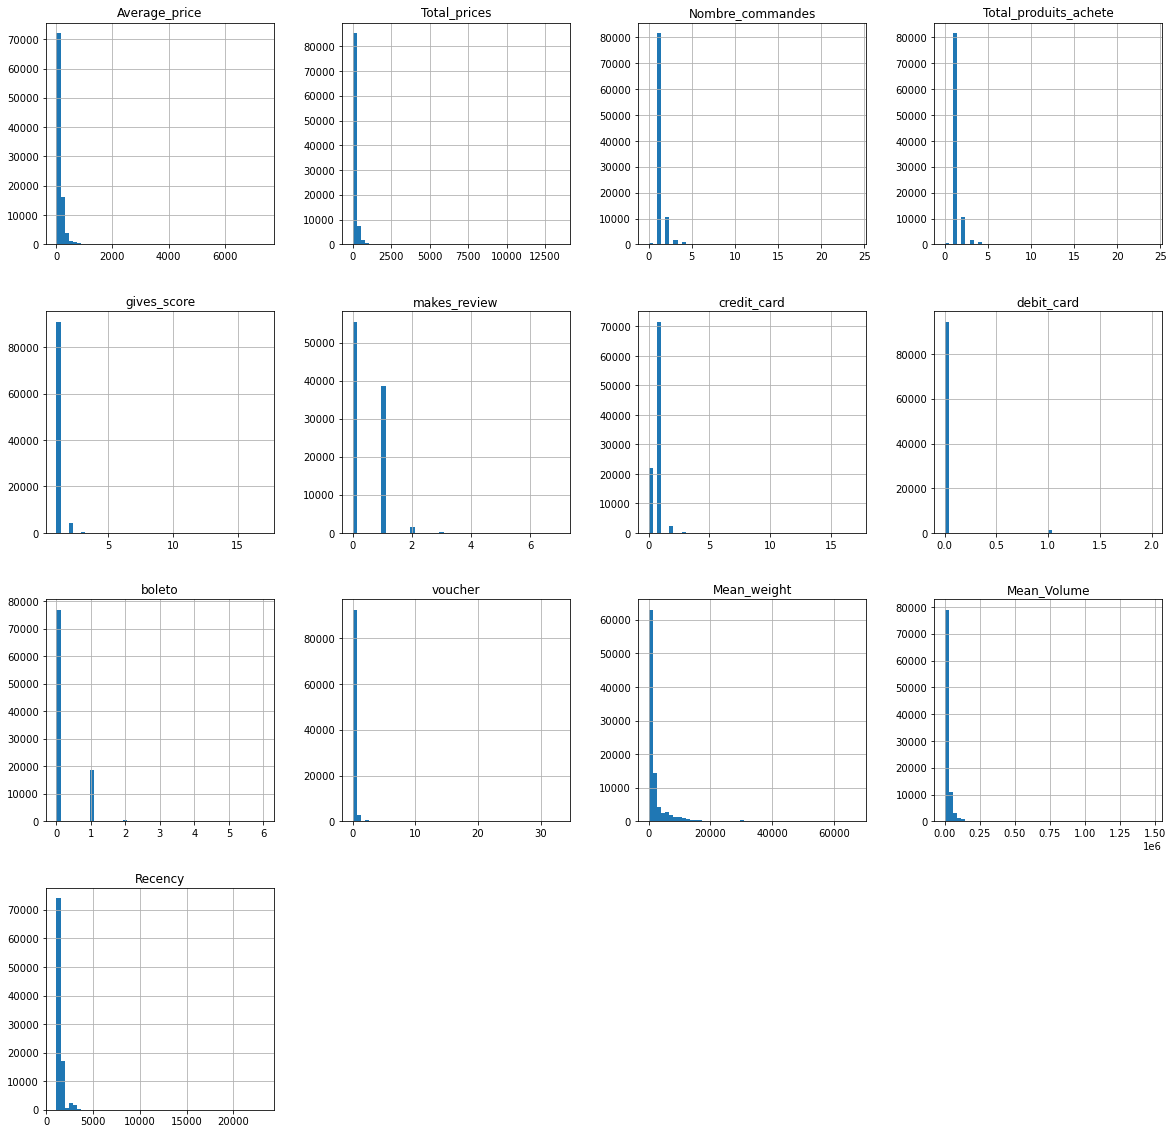

In [56]:
#histogramme des nouvelles variables transformées 
final_customer_dataframe.hist(bins=50, figsize= (20,20))
plt.show()

In [57]:
final_customer_dataframe.columns

Index(['Average_price', 'Total_prices', 'Nombre_commandes',
       'Total_produits_achete', 'gives_score', 'makes_review', 'credit_card',
       'debit_card', 'boleto', 'voucher', 'Mean_weight', 'Mean_Volume',
       'Recency'],
      dtype='object')

In [58]:
def scatter_plots(df, a, b):  
    df_copy= df.copy()
    df_copy.plot(x=a, y=b, kind="scatter",  figsize=(8, 6));
    

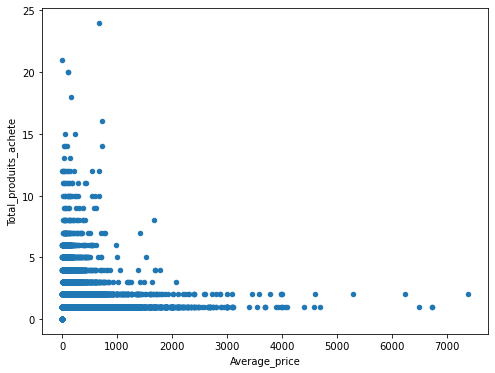

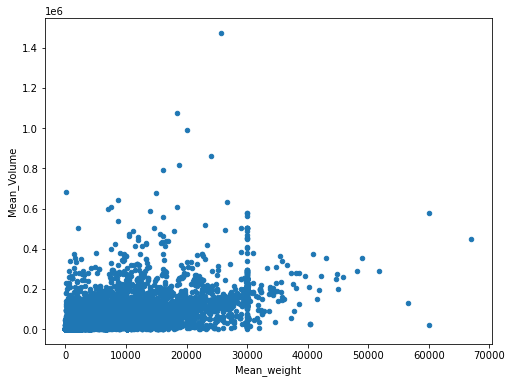

In [59]:
scatter_plots(final_customer_dataframe,'Average_price' , 'Total_produits_achete' )
scatter_plots(final_customer_dataframe, 'Mean_weight' ,'Mean_Volume' )


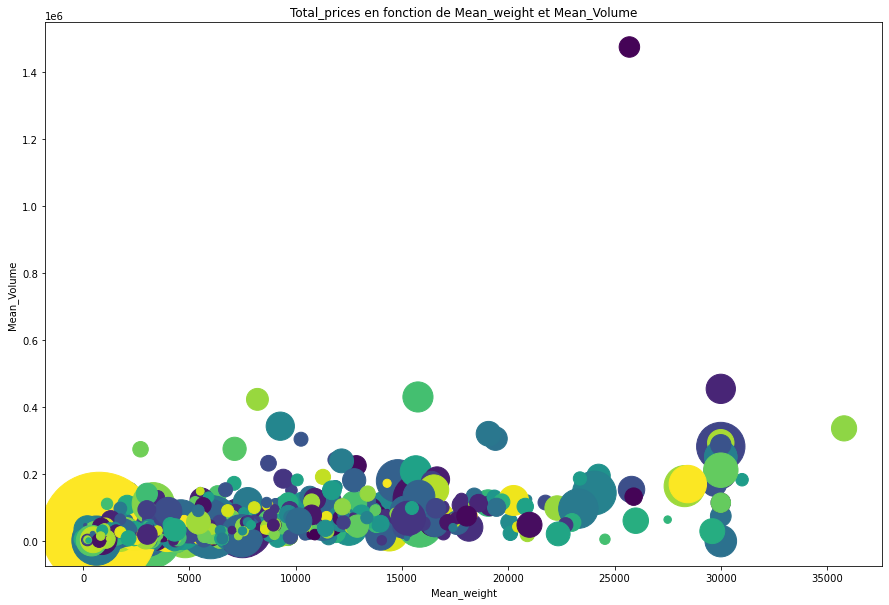

In [60]:
#graphiques à bulle, 
def graph_bull(df, var1, var2, var3):
    df_temp = df[[var1, var2, var3]]
    x = df_temp[var1]
    y = df_temp[var2] 
    s = df_temp[var3]
    
    colors = np.random.rand (len(s)) 
    plt.figure(figsize=(15,10))
    plt.scatter (x, y, s=s, c = colors)
    plt.title(var3 +" en fonction de "+ var1 +" et "+ var2)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show ()
graph_bull(final_customer_dataframe.head(5000), 'Mean_weight' , 'Mean_Volume', 'Total_prices')


In [61]:
#matrice de correlation avec heatmap 
def correlation_matrix(df):
    plt.figure(figsize = (18,10))
    heatmap= sns.heatmap(df.corr(), annot=True, cmap='BrBG');
    heatmap.set_title('Matrice de correlation des variables sélectionnées', fontdict={'fontsize':12}, pad=12);
   

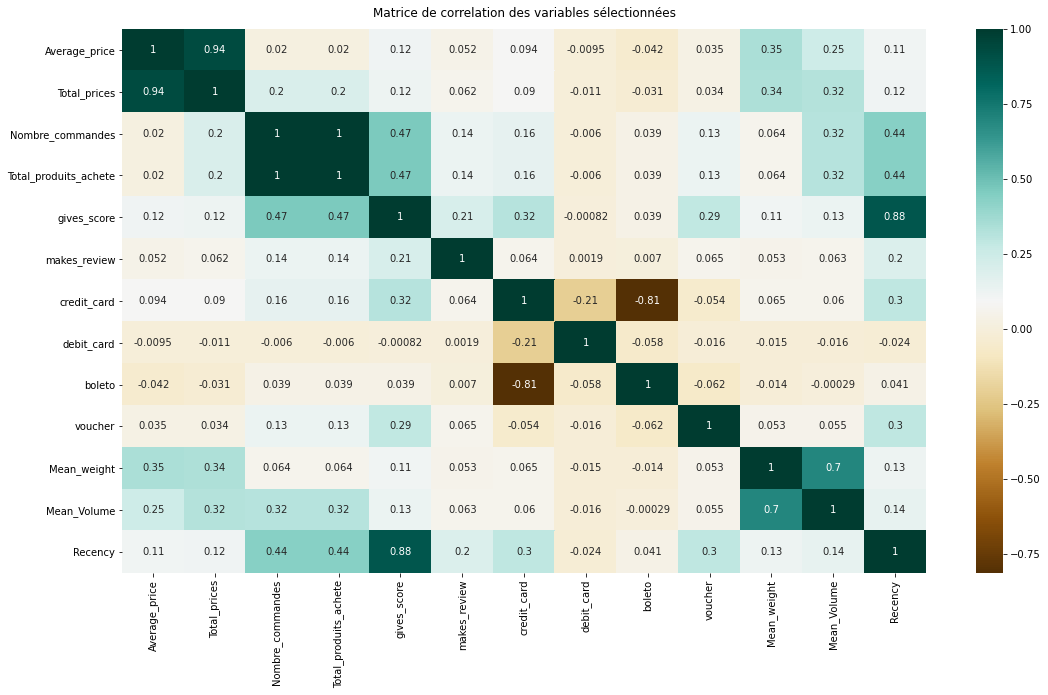

In [62]:
correlation_matrix(final_customer_dataframe)
    